In [1]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import re
import pandas as pd
from time import time
from matplotlib import pyplot as plt
import copy



In [2]:
test_size = 0.25

data = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv')

all_inputs = data.iloc[:, :28]
all_labels = data.loc[:, 'Label']

In [3]:
data_pca = pd.read_csv('data/data_pca.csv')

all_inputs_pca = data_pca.iloc[:, :9]
all_labels_pca = data_pca.loc[:, 'Label']

MLPClassifier
[0.84920229 0.86173258 0.87190787 0.88432099 0.86939734 0.86216272
 0.93047457 0.86122015 0.92669904 0.88721073]
BaggingClassifier
[0.99961931 0.9995592  0.99967941 0.99965939 0.99967943 0.99955921
 0.99965938 0.99953916 0.99951913 0.99959926]
AdaBoostClassifier
[0.99921858 0.99909837 0.99923859 0.99885796 0.99911843 0.99901823
 0.99915848 0.99893807 0.99903827 0.99885789]
ExtraTreesClassifier
[0.99981967 0.99967942 0.99985974 0.99991986 0.99973954 0.99973953
 0.99989982 0.99961931 0.99981968 0.99981967]
QuadraticDiscriminantAnalysis
[0.88828701 0.89594077 0.88491156 0.88997678 0.88819844 0.88942634
 0.88931619 0.8911047  0.89076373 0.88882528]
RandomForestClassifier
[0.99993989 0.99987978 0.99989982 0.99985975 0.99989982 0.99985975
 0.99991985 0.9997796  0.99983971 0.99991985]
GaussianNB
[0.7819596  0.73013137 0.7824003  0.78069841 0.7831171  0.77990135
 0.78209366 0.76102297 0.78403981 0.7690679 ]
LogisticRegression
[0.82116167 0.7189074  0.7867531  0.81641181 0.7915153

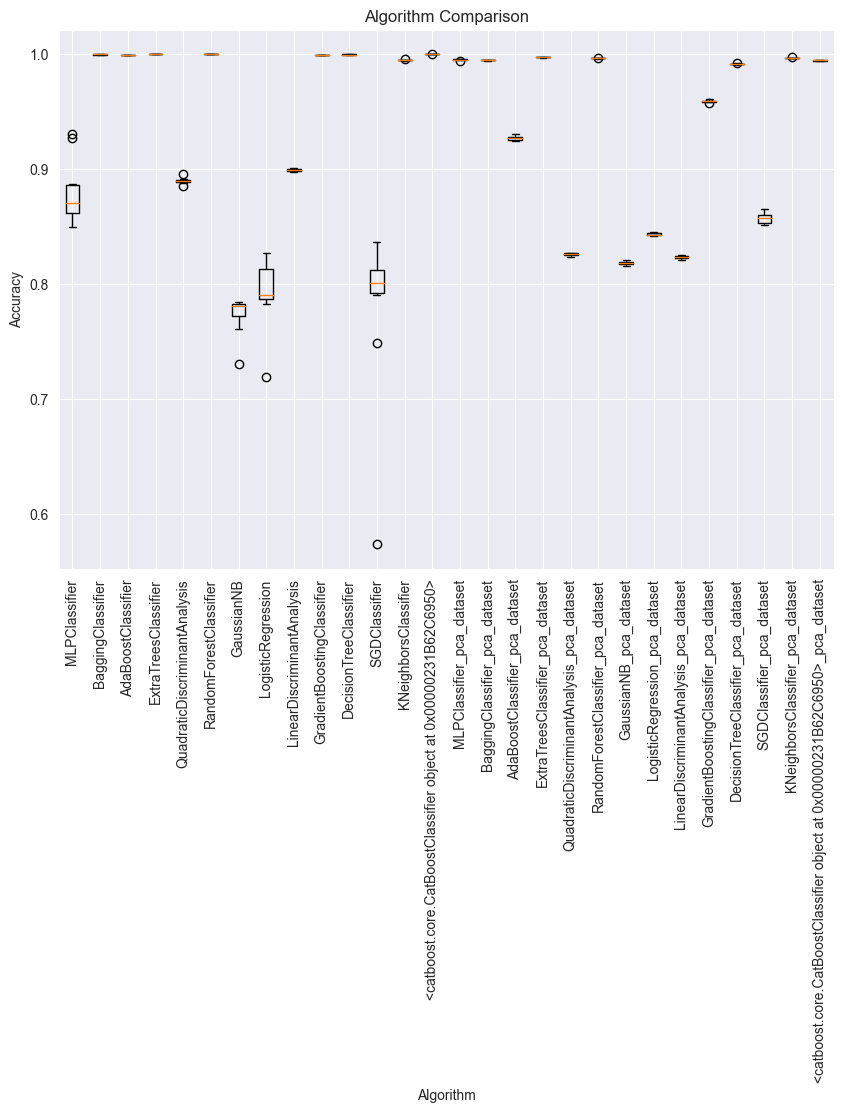

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score

model_set = [
    MLPClassifier(),
    BaggingClassifier(n_jobs=-1),
    AdaBoostClassifier(),
    ExtraTreesClassifier(n_jobs=-1),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(n_jobs=-1),
    GaussianNB(),
    LogisticRegression(n_jobs=-1),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    SGDClassifier(n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1),
    CatBoostClassifier(logging_level='Silent'),
]


def filter_parentheses(content):
    regex = r'\([^()]*\)'
    while re.search(regex, content):
        content = re.sub(regex, '', content)
    return content

model_performance = []
names = [filter_parentheses(str(i)) for i in model_set] + [filter_parentheses(str(i)) + '_pca_dataset' for i in model_set]

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    print(filter_parentheses(str(model)))
    cv_results = cross_val_score(model,all_inputs, all_labels, cv=kfold, scoring='f1_macro', n_jobs=-1)
    model_performance.append(cv_results)
    print(cv_results)

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    print(filter_parentheses(str(model)) + "_pca")
    cv_results = cross_val_score(model,all_inputs_pca, all_labels_pca, cv=kfold, scoring='f1_macro', n_jobs=-1)
    model_performance.append(cv_results)
    print(cv_results)

accuracy = []
index = 0

for i in model_performance:
    for j in i:
        accuracy.append({'model': names[index], 'accuracy': j})
    index += 1

accuracy = pd.DataFrame(accuracy, index=None)
accuracy.to_csv("data/model_cross_val_score")

plt.figure(figsize=(10,7))
plt.boxplot(model_performance, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

plt.show()

66.69456076622009
MLPClassifier
13.511236429214478
BaggingClassifier


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


66.50135660171509
AdaBoostClassifier
4.990943193435669
ExtraTreesClassifier
0.5813226699829102
QuadraticDiscriminantAnalysis
16.536450624465942
RandomForestClassifier
0.5067572593688965
GaussianNB
3.47072434425354
LogisticRegression
1.10380220413208
LinearDiscriminantAnalysis
244.553560256958
GradientBoostingClassifier
12.455143928527832
DecisionTreeClassifier
6.957465171813965
SGDClassifier
0.3950667381286621
KNeighborsClassifier
22.624550819396973


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


136.94626450538635
MLPClassifier_pca
7.633562803268433
BaggingClassifier_pca


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


41.45405602455139
AdaBoostClassifier_pca
3.1618669033050537
ExtraTreesClassifier_pca
0.41069793701171875
QuadraticDiscriminantAnalysis_pca
15.313743114471436
RandomForestClassifier_pca
0.41311025619506836
GaussianNB_pca
1.8990683555603027
LogisticRegression_pca
0.8202085494995117
LinearDiscriminantAnalysis_pca
118.85260248184204
GradientBoostingClassifier_pca
6.576189994812012
DecisionTreeClassifier_pca
0.6546752452850342
SGDClassifier_pca
0.8006081581115723
KNeighborsClassifier_pca
20.80490803718567
<catboost.core.CatBoostClassifier object at 0x00000231B9DD5050>_pca


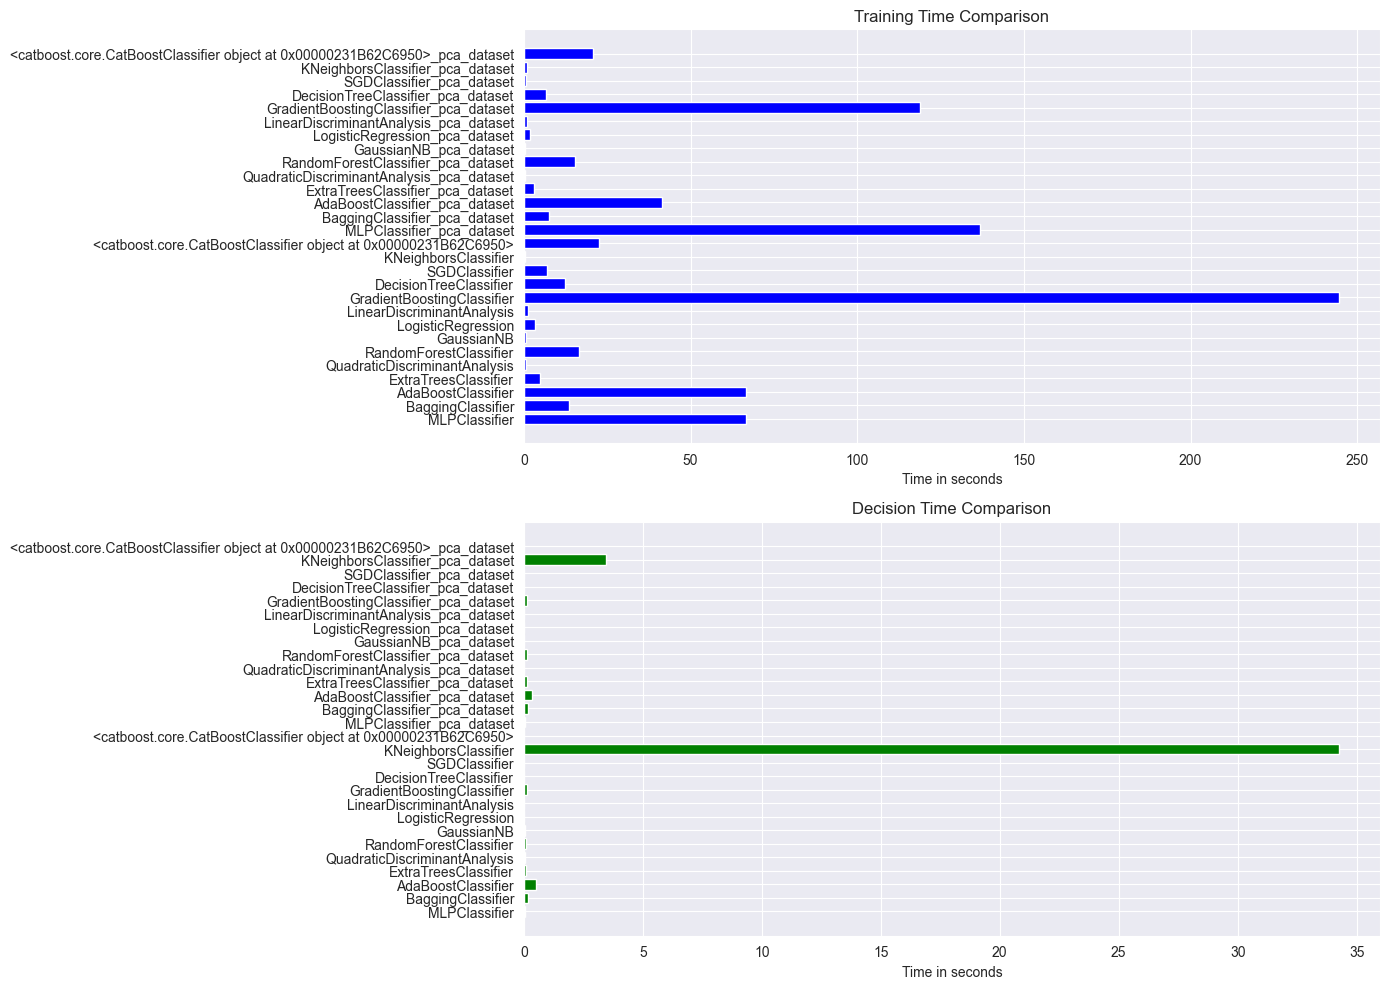

In [5]:
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=test_size, random_state=42)

train_times = []
decision_times = []

for model in model_set:
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time() - start_time
    train_times.append(end_time)
    print(end_time)
    print(filter_parentheses(str(model)))

    start_time = time()
    model.predict(X_test)
    decision_times.append(time() - start_time)
    
X_train, X_test, y_train, y_test = train_test_split(all_inputs_pca, all_labels_pca, test_size=test_size, random_state=42)

model_set_pca = copy.deepcopy(model_set)

for model in model_set_pca:
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time() - start_time
    print(end_time)
    print(filter_parentheses(str(model)) + "_pca")
    train_times.append(time() - start_time)

    start_time = time()
    model.predict(X_test)
    decision_times.append(time() - start_time)
    
csv = pd.DataFrame({"Mode Name":names, 'Training Time': train_times, 'Decision Time': decision_times})

csv.to_csv("data/model_execution_time.csv",index=False)
    
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
ax[0].barh(names, train_times, color='blue')
ax[0].set_title('Training Time Comparison')
ax[0].set_xlabel('Time in seconds')

ax[1].barh(names, decision_times, color='green')
ax[1].set_title('Decision Time Comparison')
ax[1].set_xlabel('Time in seconds')

plt.tight_layout()
plt.show()

MLPClassifier
BaggingClassifier
AdaBoostClassifier
ExtraTreesClassifier
QuadraticDiscriminantAnalysis
RandomForestClassifier
GaussianNB
LogisticRegression
LinearDiscriminantAnalysis
GradientBoostingClassifier
DecisionTreeClassifier
SGDClassifier
KNeighborsClassifier


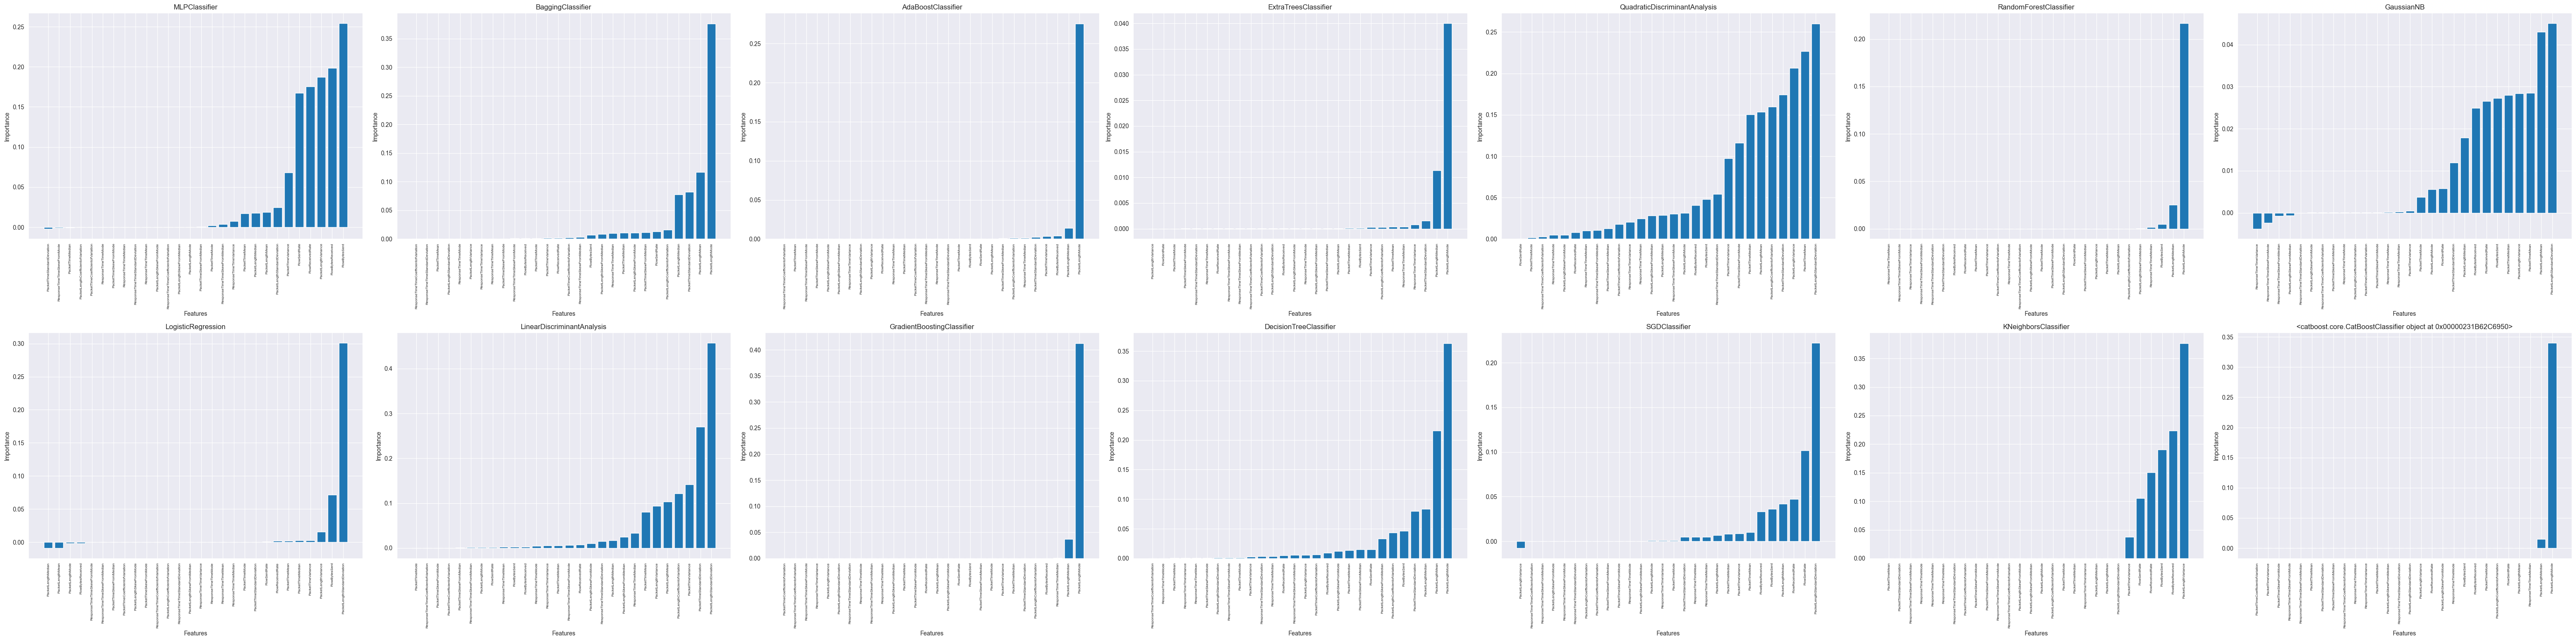

In [6]:
from sklearn.inspection import permutation_importance

i = 0
plt.figure(figsize=(60,15))

feature_importances = {}

for model in model_set:
    importances = permutation_importance(model, all_inputs, all_labels, n_repeats=1, random_state=42, n_jobs=-1)
    print(names[i])
    
    features = all_inputs.columns
    model_results_df = pd.DataFrame({'Mean Importance': importances.importances_mean, 'Std Dev': importances.importances_std}, index=features)
    model_results_df.to_csv("data/feature_importances" + names[i].replace('<','').replace('>','') + ".csv")

    sorted_idx = importances.importances_mean.argsort()
    feature_importances[names[i]] = importances.importances_mean

    ax = plt.subplot(2, 7, i + 1)
    ax.bar(range(len(sorted_idx)), importances.importances_mean[sorted_idx], yerr=importances.importances_std[sorted_idx])
    ax.set_title(names[i])
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(len(sorted_idx)))
    ax.set_xticklabels(features[sorted_idx], rotation=90, fontsize=6)

    i += 1

plt.tight_layout()
plt.show()


MLPClassifier_pca_dataset_pca
BaggingClassifier_pca_dataset_pca
AdaBoostClassifier_pca_dataset_pca
ExtraTreesClassifier_pca_dataset_pca
QuadraticDiscriminantAnalysis_pca_dataset_pca
RandomForestClassifier_pca_dataset_pca
GaussianNB_pca_dataset_pca
LogisticRegression_pca_dataset_pca
LinearDiscriminantAnalysis_pca_dataset_pca
GradientBoostingClassifier_pca_dataset_pca
DecisionTreeClassifier_pca_dataset_pca
SGDClassifier_pca_dataset_pca
KNeighborsClassifier_pca_dataset_pca
<catboost.core.CatBoostClassifier object at 0x00000231B62C6950>_pca_dataset_pca


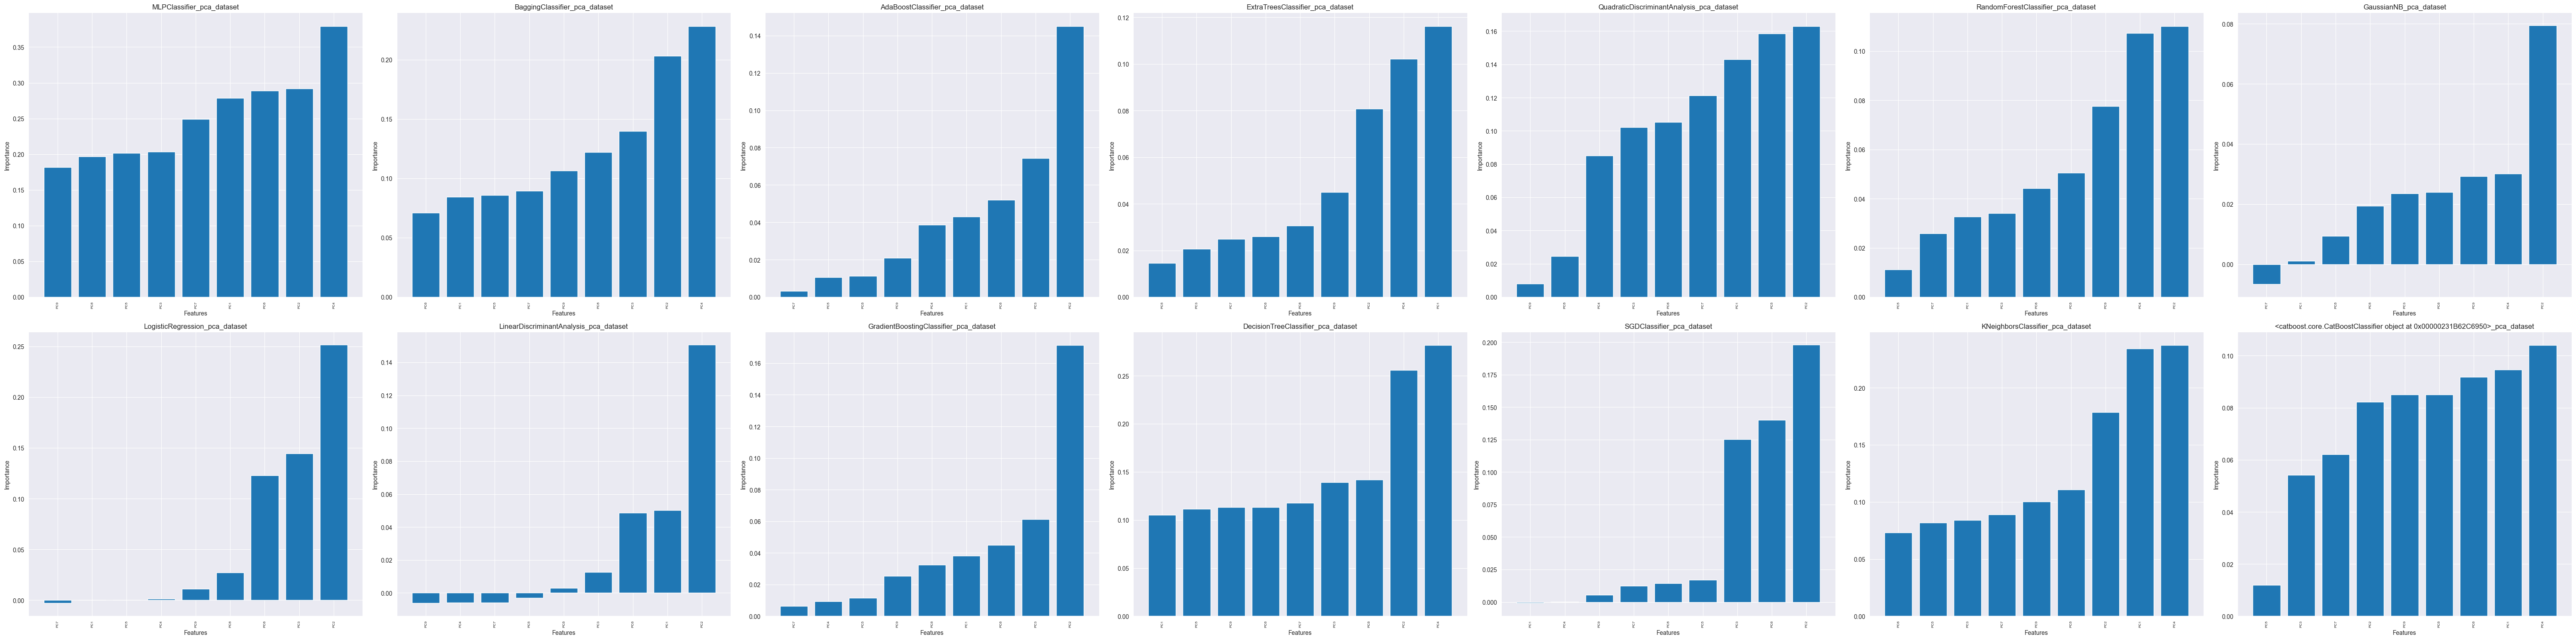

In [7]:
plt.figure(figsize=(60,15))
i = 14
a = 0

for model in model_set_pca:
    importances = permutation_importance(model, all_inputs_pca, all_labels_pca, n_repeats=1, random_state=42, n_jobs=-1)
    print(names[i] + "_pca")

    features = all_inputs_pca.columns
    model_results_df = pd.DataFrame({'Mean Importance': importances.importances_mean, 'Std Dev': importances.importances_std}, index=features)
    model_results_df.to_csv("data/feature_importances" + names[i].replace('<','').replace('>','') + "_pca.csv")
    sorted_idx = importances.importances_mean.argsort()
    feature_importances[names[i]] = importances.importances_mean

    ax = plt.subplot(2, 7, a + 1)
    ax.bar(range(len(sorted_idx)), importances.importances_mean[sorted_idx], yerr=importances.importances_std[sorted_idx])
    ax.set_title(names[i])
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    ax.set_xticks(range(len(sorted_idx)))
    ax.set_xticklabels(all_inputs_pca.columns[sorted_idx], rotation=90, fontsize=6)

    i += 1
    a += 1
    
plt.tight_layout()
plt.show()


MLPClassifier
[5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.84672641 0.92762124 0.84936165 0.91562486 0.92881326 0.92173967
 0.93259819 0.77616967 0.8543244  0.85279372]

BaggingClassifier
[0, 1, 2, 3, 4, 5, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99975956 0.99983971 0.9998397  0.99979964 0.99963936 0.99981968
 0.99971949 0.99971949 0.99971949 0.99981967]

AdaBoostClassifier
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99436995 0.99380842 0.99442925 0.99442988 0.99422967 0.99475065
 0.99400921 0.99513093 0.99314736 0.99410937]

ExtraTreesClassifier
[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[0.99979964 0.99981967 0.99979963 0.99989982 0.99989982 0.99979964
 0.99981967 0.99989982 0.99985975 0.99993989]

QuadraticDiscriminantAnalysis
[1, 3, 10, 16, 17, 19, 20, 22, 23, 24, 25, 27]
[0.9265163  0.92391329 0

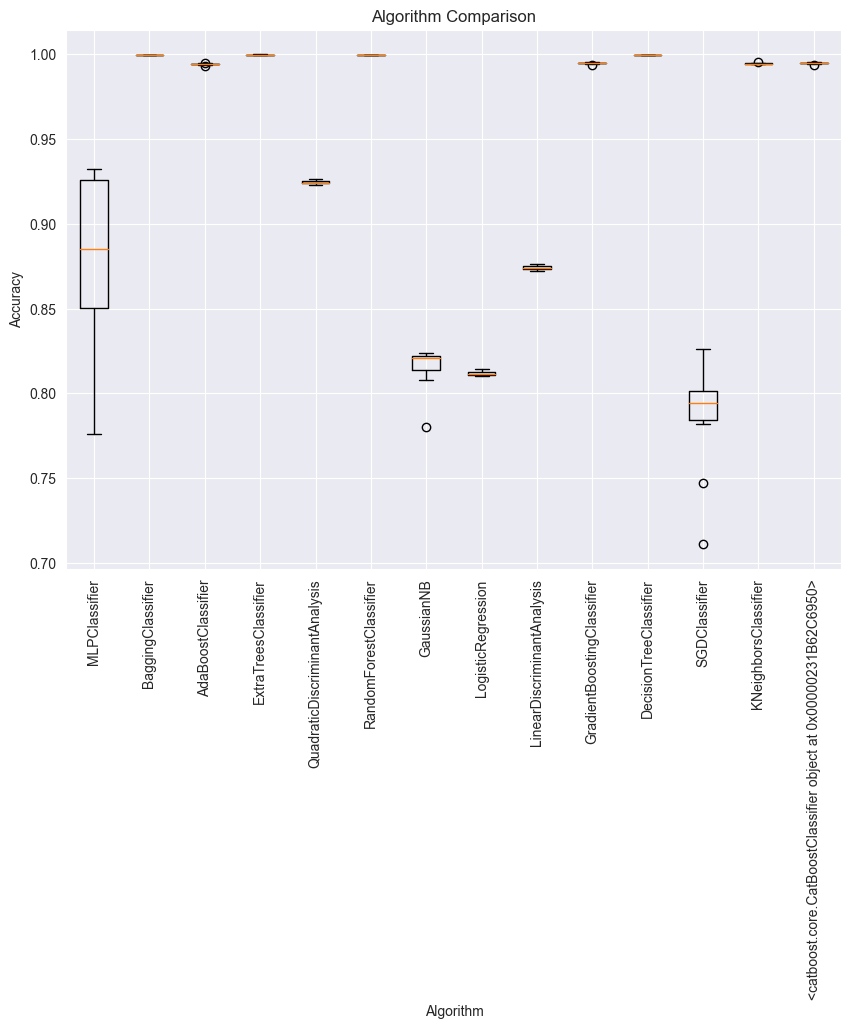

In [8]:
i = 0

new_model_performance = []

for model in model_set:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    threshold = max(feature_importances[names[i]]) / 10
    indexes = [index for index, value in enumerate(feature_importances[names[i]]) if value  < threshold]
    
    data_subset = data.drop(columns=data.columns[indexes])
    x = data_subset.drop(columns=['Label'])
    y = data_subset['Label']

    cv_results = cross_val_score(model,x, y, cv=kfold, scoring='f1_macro', n_jobs=-1)
    new_model_performance.append(cv_results)
    
    print(names[i])
    print(indexes)
    print(cv_results)
    print()
    
    i += 1
    
print(len(new_model_performance))

def average(lst):
    return sum(lst) / len(lst)

# for j,count in enumerate(new_model_performance):
#     avg_new = average(new_model_performance[j])
#     avg_old = average(model_performance[j])
#     print(names[j] + ": " + str(avg_new) + ", " + str(avg_old))
    
plt.figure(figsize=(10,7))
plt.boxplot(new_model_performance, labels=names[:14])
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()


MLPClassifier_pca_dataset
[0.27874239 0.29219244 0.20316726 0.37922205 0.20141814 0.28902277
 0.24927771 0.19684596 0.18202546]
MLPClassifier_pca_dataset
[]
[0.99562218 0.99549184 0.99545181 0.99529157 0.99543174]

BaggingClassifier_pca_dataset
[0.08428069 0.20310716 0.13986808 0.22813591 0.0859617  0.07098091
 0.08939584 0.12188593 0.10651845]
BaggingClassifier_pca_dataset
[]
[0.99429982 0.99408937 0.99396903 0.99449011 0.99448001]

AdaBoostClassifier_pca_dataset
[0.04308303 0.14501729 0.07441906 0.03871122 0.0105729  0.05204906
 0.00310555 0.01134829 0.02096749]
AdaBoostClassifier_pca_dataset
[4, 6, 7]
[0.91959052 0.91854201 0.91644515 0.91790814 0.91532609]

ExtraTreesClassifier_pca_dataset
[0.11620778 0.08071031 0.02059082 0.10225684 0.01451796 0.02600249
 0.02487247 0.03062476 0.04495839]
ExtraTreesClassifier_pca_dataset
[]
[0.99685439 0.99727509 0.99719493 0.9970948  0.9973953 ]

QuadraticDiscriminantAnalysis_pca_dataset
[0.14305779 0.16295737 0.10219072 0.08504005 0.15853145 0.1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'MLPClassifier_pca_dataset'),
  Text(2, 0, 'BaggingClassifier_pca_dataset'),
  Text(3, 0, 'AdaBoostClassifier_pca_dataset'),
  Text(4, 0, 'ExtraTreesClassifier_pca_dataset'),
  Text(5, 0, 'QuadraticDiscriminantAnalysis_pca_dataset'),
  Text(6, 0, 'RandomForestClassifier_pca_dataset'),
  Text(7, 0, 'GaussianNB_pca_dataset'),
  Text(8, 0, 'LogisticRegression_pca_dataset'),
  Text(9, 0, 'LinearDiscriminantAnalysis_pca_dataset'),
  Text(10, 0, 'GradientBoostingClassifier_pca_dataset'),
  Text(11, 0, 'DecisionTreeClassifier_pca_dataset'),
  Text(12, 0, 'SGDClassifier_pca_dataset'),
  Text(13, 0, 'KNeighborsClassifier_pca_dataset'),
  Text(14, 0, '<catboost.core.CatBoostClassifier object at 0x00000231B62C6950>_pca_dataset')])

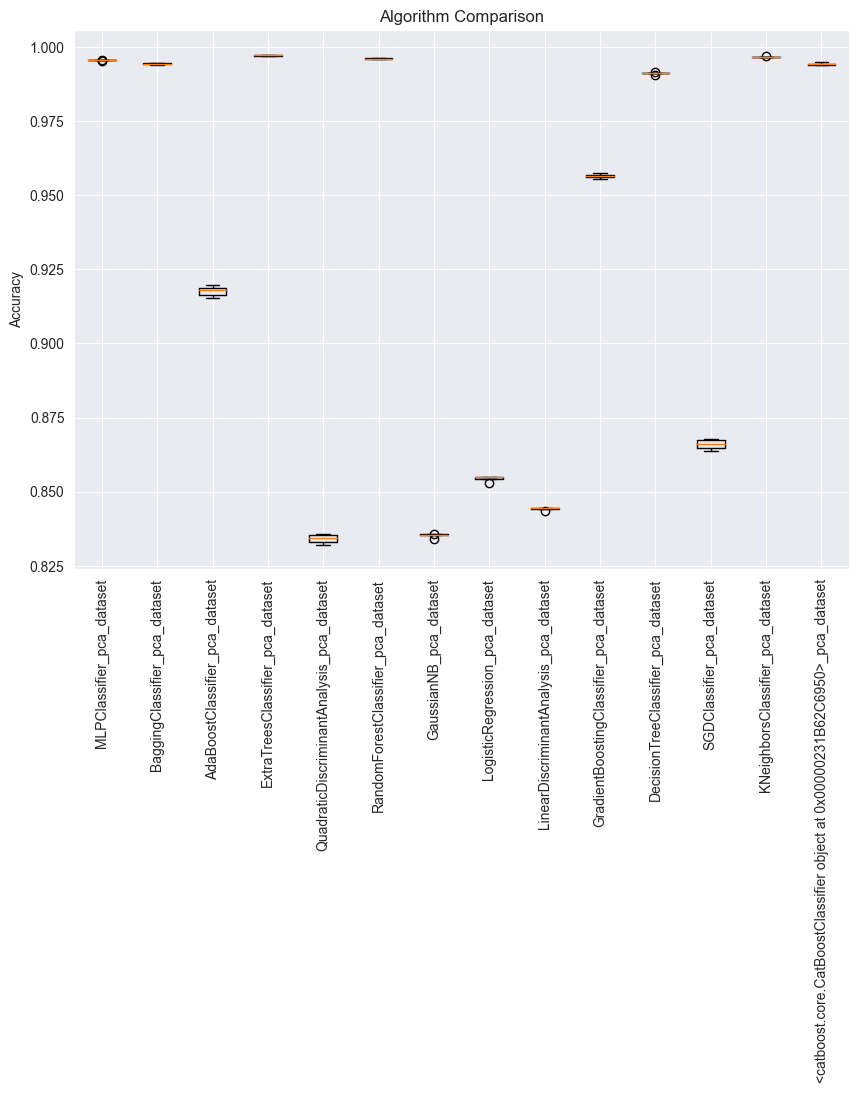

In [9]:
i = 14

for model in model_set_pca:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    print(names[i])
    print(feature_importances[names[i]])
    threshold = max(feature_importances[names[i]]) / 10
    indexes = [index for index, value in enumerate(feature_importances[names[i]]) if value < threshold]

    data_subset = data_pca.drop(columns=data_pca.columns[indexes])
    x = data_subset.drop(columns=['Label'])
    y = data_subset['Label']

    cv_results = cross_val_score(model,x, y, cv=kfold, scoring='f1_macro', n_jobs=-1)
    new_model_performance.append(cv_results)

    print(names[i])
    print(indexes)
    print(cv_results)
    print()
    i += 1

plt.figure(figsize=(10,7))
plt.boxplot(new_model_performance[14:], labels=names[14:])
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)